In [19]:
from pyimagesearch.transform import four_point_transform
from pyimagesearch import imutils
from skimage.filters import threshold_adaptive
import numpy as np
import argparse
import cv2
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline

In [20]:
#image = cv2.imread('document-scanner/images/receipt2.jpg')
#image = cv2.imread('document-scanner/images/braums-4.jpg')
image = cv2.imread('document-scanner/images/1-original-receipt-view.png')
ratio = image.shape[0] / 500.0
orig = image.copy()
image = imutils.resize(image, height = 500)

In [21]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray = cv2.GaussianBlur(gray, (5, 5), 0)
edged = cv2.Canny(gray, 75, 200)

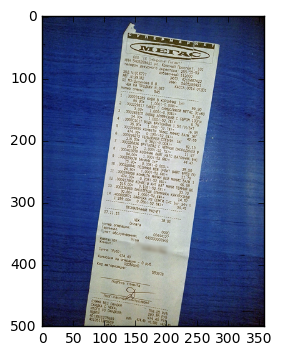

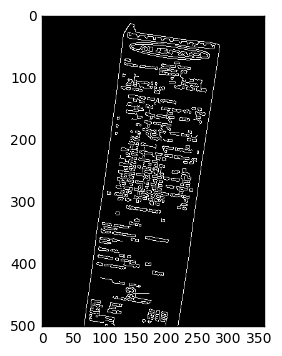

In [22]:
plt.imshow(image)
plt.show()
plt.imshow(edged, cmap='gray')
plt.show()

In [23]:
_, cnts, hierarchy = cv2.findContours(edged.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
cnts = sorted(cnts, key = cv2.contourArea, reverse = True)[:10]
screenCnt = None
i = 0
maxp = 0
selp = 0
selc = None
for c in cnts:
	#print ("countur %d" % i)
	#i = i + 1
	# approximate the contour
	peri = cv2.arcLength(c, True)
	approx = cv2.approxPolyDP(c, 0.02 * peri, True)
	#print ("peri is %s" % peri)
#	if selp < peri:
#		selp = peri
#		selc = approx
	#print ("approx is %s" % approx) 
	# if our approximated contour has four points, then we
	# can assume that we have found our screen
	if len(approx) == 4:
		#print ("found countur")
		screenCnt = approx
		#print(type(screenCnt))
		break
#print("selp %s" % selp)

In [24]:
#cv2.drawContours(image, [screenCnt], -1, (0, 255, 0), 2)
cv2.drawContours(image, cnts, -1, (0, 255, 0), 2)
#cv2.drawContours(image, [selc], 0, (0, 255, 0), 2)

array([[[27, 33, 65],
        [29, 34, 67],
        [27, 32, 65],
        ..., 
        [19, 13, 17],
        [11,  7,  7],
        [10,  8,  8]],

       [[28, 35, 67],
        [29, 34, 67],
        [28, 31, 67],
        ..., 
        [16,  9, 13],
        [19, 10, 18],
        [17, 13, 18]],

       [[25, 32, 62],
        [31, 36, 71],
        [26, 30, 66],
        ..., 
        [15,  9, 12],
        [21, 12, 21],
        [23, 18, 28]],

       ..., 
       [[16, 16, 35],
        [17, 18, 29],
        [13, 14, 22],
        ..., 
        [23, 13, 28],
        [20,  9, 23],
        [20,  9, 15]],

       [[20, 17, 45],
        [11, 10, 28],
        [ 6,  5, 18],
        ..., 
        [15,  6, 13],
        [12,  5,  8],
        [22, 11, 12]],

       [[23, 20, 46],
        [ 7,  6, 26],
        [15, 12, 35],
        ..., 
        [ 8,  3,  5],
        [15,  7,  6],
        [ 9,  3,  2]]], dtype=uint8)

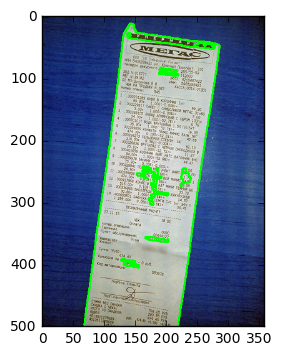

In [25]:
plt.imshow(image)
plt.show()

In [26]:
warped = four_point_transform(orig, screenCnt.reshape(4, 2) * ratio)
warped = cv2.cvtColor(warped, cv2.COLOR_BGR2GRAY)
warped = threshold_adaptive(warped, 251, offset = 10)
warped = warped.astype("uint8") * 255

AttributeError: 'NoneType' object has no attribute 'reshape'

In [ ]:
plt.imshow(imutils.resize(warped, height = 650), cmap='gray')
plt.show()

In [ ]:
fig = plt.figure()
a=fig.add_subplot(1,2,1)
imgplot1 = plt.imshow(imutils.resize(orig, height = 650))
a.set_title('Before')
a=fig.add_subplot(1,2,2)
imgplot2 = plt.imshow(imutils.resize(warped, height = 650), cmap='gray')
a.set_title('After')
plt.show()

In [ ]:
im = Image.fromarray(imutils.resize(warped, height = 650, width = 650))
im.save("your_file.jpeg")


In [ ]:
%%bash
ocropus-nlbin -n your_file.jpeg -o img_out


In [ ]:
%%bash
ocropus-gpageseg -n --maxcolseps 0 --minscale 8.0 img_out/0001.bin.png 

In [ ]:
%%bash
ocropus-rpred -m en-default.pyrnn.gz img_out/0001/*.png

In [ ]:
%%bash
cat img_out/????/??????.txt > ocr.txt